In [1]:
%pylab inline
from scipy import ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec

sys.path.append('../../../')
from tractionforce.elasticity import *
import gc
from tractionforce.norms import *
from joblib import Parallel, delayed
import multiprocessing
import pickle
import gzip

def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

Populating the interactive namespace from numpy and matplotlib


In [2]:
results_1 = pickle.load(gzip.open('../results/anisotropic_L1_results.gz', 'rb'))
results_5 = pickle.load(gzip.open('../results/anisotropic_L2_results.gz', 'rb'))
results_2 = pickle.load(gzip.open('../results/isotropic_L1_results.gz', 'rb'))
results_3 = pickle.load(gzip.open('../results/isotropic_TV_results1.gz','rb'))
results_4 = pickle.load(gzip.open('../results/isotropic_TV_results2.gz','rb'))

results = [results_1, results_5, results_2,results_3,results_4]
#Phi_labels = [r"$\Vert \sigma_{xz} + \sigma_{yz}\Vert_1$",
#              r"$\Vert \sigma_{xz} \Vert_1 + \Vert \sigma_{yz} \Vert_1$",
#              r"$\Vert \nabla(\sigma_x+\sigma_y )\Vert_1$",
#              r"$\Vert (\partial_x + \partial_y)\sigma_x \Vert_1 + \Vert\partial_x+\partial_y)\sigma_y \Vert_1$",
#              r"$\Vert \partial_x \sigma_x \Vert_1 + \Vert \partial_y \sigma_x \Vert_1 + \Vert\partial_x \sigma_y\Vert_1 + \Vert\partial_y \sigma_y\Vert_1$"
#             ]

Phi_labels = [r"$\tilde{\Phi}_{L^1}$",
             r"$\tilde{\Phi}_{L^2}$",
             r"$\Phi_{L^1}$",
             r"$\Phi_{TV_1}$",
             r"$\Phi_{TV_2}$"]


In [3]:
x_1 = results_1[-1][0]
y_1 = results_1[-1][1]
for rel in results: del(rel[-1])
x_min, x_max = 69.974999999999994, 133.72999999999999
y_min, y_max = 139.94999999999999, 189.71000000000001

In [4]:
# do individual figures and use tikz to put it all together?

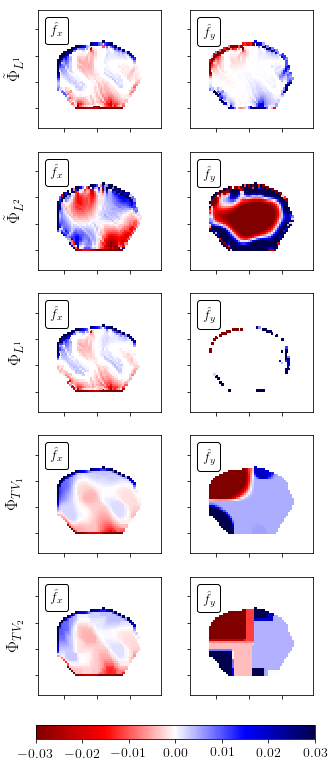

In [10]:
fig = plt.figure(figsize=(5,14))
ax = []
im = []

maxmagnitude = np.max(np.abs(results[0][-1][0]))
maxmagnitude = 0.04
gs0 = gridspec.GridSpec(len(results),2)

gs_j = []

gs_j_innergrids = []

for j in range(len(results)):
    
    
    data_error = [res[2] for res in results[j]]
    reg_error = [res[3] for res in results[j]]
    lvals = [res[4] for res in results[j]]

    l_curve_distances = np.abs((reg_error[-1]-reg_error[0])*np.array(data_error) -  \
                (data_error[-1]-data_error[0])*np.array(reg_error)+data_error[-1]*reg_error[0]-reg_error[-1]*data_error[0])
    best = np.argsort(l_curve_distances)[-1]

    Fx = results[j][best][0][:,0].reshape((len(x_1),len(y_1))).transpose()
    Fy = results[j][best][0][:,1].reshape((len(x_1),len(y_1))).transpose()
    
    ax += [plt.Subplot(fig, gs0[j,0])]
    fig.add_subplot(ax[-1])
    
    ax[-1].set_xlim((x_min - 15, x_max + 15))
    ax[-1].set_ylim((y_min - 15, y_max + 25))
    ax[-1].set_yticklabels([])
    ax[-1].set_xticklabels([])
    ax[-1].set_ylabel(Phi_labels[j],fontsize=18)
    
    at = AnchoredText("$\hat{f}_{x}$",
                  prop=dict(size=14), frameon=True,
                  loc=2,
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax[-1].add_artist(at)

    z = np.ma.masked_array(Fx, np.abs(Fx) < 1e-5)    
    im += [ax[-1].pcolormesh(x_1,y_1,z,
                        cmap='seismic_r', rasterized = True,
                             vmax = maxmagnitude*.75, vmin=-maxmagnitude*.75)]
    im[-1].axes.set_aspect('equal')

    
    
    #################################################################
    ax += [plt.Subplot(fig, gs0[j,1])]
    fig.add_subplot(ax[-1])
    
    ax[-1].set_xlim((x_min - 15, x_max + 15))
    ax[-1].set_ylim((y_min - 15, y_max + 25))
    ax[-1].set_yticklabels([])
    ax[-1].set_xticklabels([])
    
    at = AnchoredText("$\hat{f}_{y}$",
                  prop=dict(size=14), frameon=True,
                  loc=2,
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax[-1].add_artist(at)
    
    z = np.ma.masked_array(Fy, np.abs(Fy) < 1e-5)        
    ax[-1].pcolormesh(x_1,y_1,z,
                        cmap='seismic_r',vmax = maxmagnitude*.75,
                      vmin=-maxmagnitude*.75,rasterized=True).axes.set_aspect('equal')
    
   
fig.colorbar(im[0], ax = ax, fraction=0.06, pad=0.04, orientation='horizontal').ax.tick_params(labelsize=14)

#plt.savefig("fig2.pdf",bbox_inches='tight', 
#               transparent=True,
#               pad_inches=0, dpi=400)


plt.savefig("../../figures/fig8.pdf",bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi=400)

#plt.show()
